In [1]:
import pandas as pd
import numpy as np

In [2]:
df_cluster = pd.read_csv('symbols-clusters.csv') 
df_price =  pd.read_csv('stocks/total_data_price_Symbol.csv', index_col='Symbol')
symbols = df_price.index
n_clusters = len(df_cluster.Cluster.unique())

In [3]:
def create_portfolio_randomly(symbols, n=10):
    selected_symbols =  np.random.choice(symbols, n, replace = False)
    return selected_symbols

In [4]:
def create_portfolio_clusterbased(df_cluster, cluster_num, n = 10 ):
    selected_symbols = []
    
    cls = 1
    for i in range(n):
        symbol = df_cluster[df_cluster['Cluster'] == cls].sample(1)['Symbol'].to_numpy()[0]
        selected_symbols.append(symbol)

        if cls < cluster_num:
            cls += 1
        else:
            cls = 1       

    return np.array(selected_symbols)

In [5]:
def calculate_return(tickers , from_date , to_date):
    
    file_temp = 'stocks/{0}.csv'
    
    returns  =  []
    close_price = []
    
    for ticker in tickers:
        
        filename = ('stocks/{0}.csv').format(ticker)
        df = pd.read_csv(filename)     
        df = df.loc[ (df['Date'] >= from_date) & (df['Date'] <= to_date)]        
        ticker_return  =  (df.iloc[-1]['Adj Close'] -  df.iloc[0]['Adj Close'])       
        
        close_price.append(df.iloc[0]['Adj Close'])
        returns.append(ticker_return)
        
    data = {'Symbol': tickers,'Price':close_price,  'Return': returns}
    df_portfolio = pd.DataFrame(data , columns=['Symbol','Price' , 'Return'] )
    df_portfolio = df_portfolio.set_index('Symbol')
    
    agg = df_portfolio.sum().reindex()
    portfolio_profit = agg['Price'] / agg['Return']
    return df_portfolio , portfolio_profit

In [14]:
counter = 20

random_returns = []
cluster_returns = []

for i in range(counter):
    random_portfolio = create_portfolio_randomly(symbols, 10)
    cluster_based_portfolio = create_portfolio_clusterbased(df_cluster , n_clusters , 10)

    random_df , random_profit = calculate_return(random_portfolio, '2019-10-01','2019-12-30')
    cluster_df , cluster_profit = calculate_return(cluster_based_portfolio, '2019-10-01','2019-12-30')
    #print("Random Portfolio Return:", random_profit)
    #print("Cluster Based Portfolio Return:"      , cluster_profit)    
    
    random_returns.append(random_profit)
    cluster_returns.append(cluster_profit)

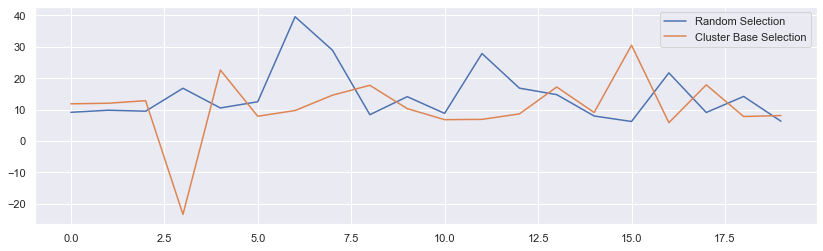

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(14, 4)})
plt.plot(range(counter), random_returns, label = 'Random Selection')
plt.plot(range(counter), cluster_returns, label = 'Cluster Base Selection')

plt.legend()
plt.show()